In [4]:
import zipfile

with zipfile.ZipFile('googleplaystore.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()



In [5]:
import os
os.listdir()




['.config', 'googleplaystore.csv.zip', 'googleplaystore.csv', 'sample_data']

In [6]:
import pandas as pd

df = pd.read_csv('googleplaystore.csv')
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.shape


(10841, 13)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [16]:
df['Installs'] = df['Installs'].astype(str)
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [11]:

df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [13]:
df['Price'].isnull().sum()
df['Price'].dtype


dtype('float64')

In [14]:
df['Reviews'] = df['Reviews'].astype(str)
df['Reviews'] = df['Reviews'].str.replace('M', '')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')



In [15]:
df['Reviews'].head()
df['Reviews'].dtype


dtype('float64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


## Data Cleaning Completed

- Converted Installs, Price, and Reviews from text to numeric format
- Removed symbols and units to enable numerical analysis
- Handled invalid and inconsistent values safely
- The dataset is now analysis-ready


## Exploratory Data Analysis (EDA)

Here, we explore key patterns in the Google Play Store dataset
to understand app distribution, pricing models, and user ratings.


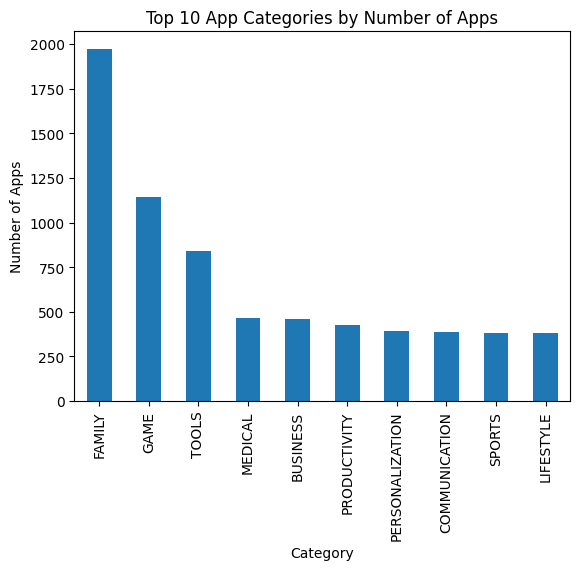

In [18]:

import matplotlib.pyplot as plt

top_categories = df['Category'].value_counts().head(10)

plt.figure()
top_categories.plot(kind='bar')
plt.title('Top 10 App Categories by Number of Apps')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()


Most apps belong to a small number of dominant categories, indicating
high competition in these segments.


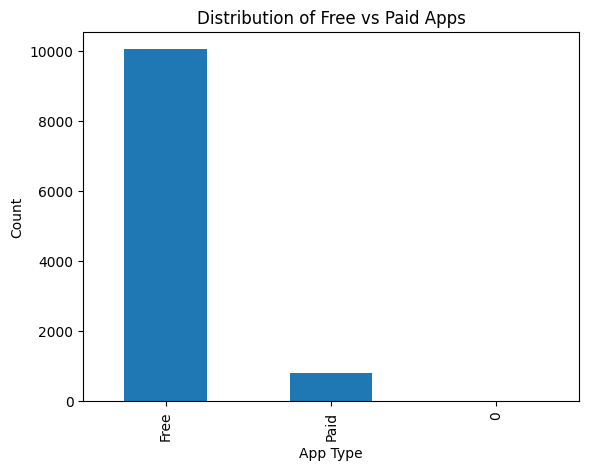

In [19]:
df['Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Count')
plt.show()


Free apps significantly outnumber paid apps on the Play Store,
highlighting a free-first ecosystem.


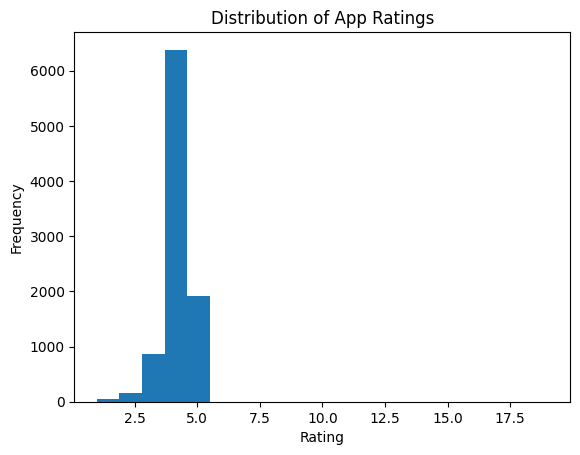

In [20]:
plt.figure()
df['Rating'].plot(kind='hist', bins=20)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


Most apps have ratings between 4.0 and 5.0, suggesting generally positive
user feedback.
